In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt

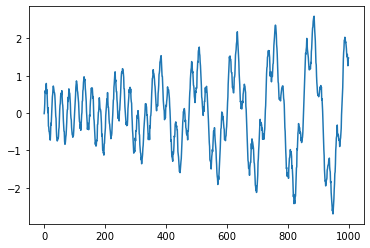

In [2]:
time_series_length = 1000
t = np.linspace(0, 50, time_series_length)
ts = t * np.cos(t) / 5 + 3 * np.sin(t*5) + 0.3 * np.random.standard_normal(size=time_series_length)
ts_norm = (ts - np.mean(ts)) / np.std(ts)
plt.plot(ts_norm)

In [3]:
train_size = int(len(ts) * 0.75)
test_size = len(ts) - train_size
train, test = ts_norm[0:train_size], ts_norm[train_size:len(ts)]

In [4]:
def create_dataset(dataset, time_steps=1):
    x, y = [], []
    for i in range(len(dataset)-time_steps-1):
        a = dataset[i:(i+time_steps)]
        x.append(a)
        y.append(dataset[i+time_steps])
    return np.array(x), np.array(y)

In [5]:
n_time_steps = 10

x_train, y_train = create_dataset(train, n_time_steps)
x_test, y_test = create_dataset(test, n_time_steps)
n_inputs = 1

x_train = np.reshape(x_train, (x_train.shape[0], n_time_steps, n_inputs))
x_test = np.reshape(x_test, (x_test.shape[0], n_time_steps, n_inputs))

In [6]:
model =  keras.Sequential()
model.add(layers.LSTM(100, input_shape=(n_time_steps, n_inputs), return_sequences=False))
model.add(layers.Dense(1))
model.compile(loss='mse', optimizer='adam')
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 100)               40800     
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


In [9]:
model.fit(x_train, y_train, epochs=10, batch_size=64, verbose=2)

Epoch 1/10
12/12 - 0s - loss: 0.0488 - 97ms/epoch - 8ms/step
Epoch 2/10
12/12 - 0s - loss: 0.0429 - 98ms/epoch - 8ms/step
Epoch 3/10
12/12 - 0s - loss: 0.0364 - 95ms/epoch - 8ms/step
Epoch 4/10
12/12 - 0s - loss: 0.0289 - 95ms/epoch - 8ms/step
Epoch 5/10
12/12 - 0s - loss: 0.0200 - 100ms/epoch - 8ms/step
Epoch 6/10
12/12 - 0s - loss: 0.0132 - 99ms/epoch - 8ms/step
Epoch 7/10
12/12 - 0s - loss: 0.0135 - 100ms/epoch - 8ms/step
Epoch 8/10
12/12 - 0s - loss: 0.0136 - 96ms/epoch - 8ms/step
Epoch 9/10
12/12 - 0s - loss: 0.0138 - 96ms/epoch - 8ms/step
Epoch 10/10
12/12 - 0s - loss: 0.0122 - 96ms/epoch - 8ms/step


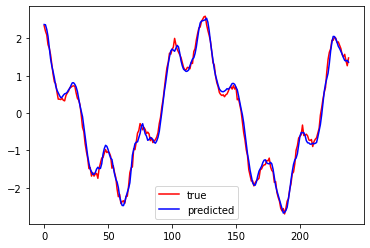

In [10]:
y_pred = model.predict(x_test)
plt.plot(y_test, 'r', label = 'true')
plt.plot(y_pred, 'b', label = 'predicted')
plt.legend()